<img src="imgs/mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data preprocessing</center>

# Challenge S8: Contaminación en Madrid

## Objetivos:

* Experimentar con datos de Open Data Madrid.
* Trabajar con datos de localización.
* Representar la contaminación en Madrid del mes de septiembre de 2018.

**NOTA:** Actualmente Google Chrome tiene un problema al renderizar gráficos complejos con folium. Por eso **se recomienda encarecidamente** el realizar esta sesión con __[Mozilla Firefox](https://www.mozilla.org/es-ES/firefox/new/)__. Si nuestro navegador por defecto no es Firefox, podremos acceder al servidor de Jupyter Notebook una vez lo hayamos lanzado, copiando la url que contiene el token en el navegador Firefox.

<img src="imgs/notebookrun.png"/>

## Inicializamos entorno

In [1]:
import numpy as np
import pandas as pd
import re
import folium
import random

%matplotlib inline
import matplotlib.pyplot as plt 

estaciones = pd.read_csv("data/madrid_estaciones_cont.csv")
contamina = pd.read_csv('data/contamina_2018_09_diario.csv')

random.seed(1234)

C:\Users\hugo\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Empezaremos a trabajar con los puestos de medida de la contaminación de Madrid. 

In [2]:
estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 24 columns):
Unnamed: 0         0 non-null float64
NÚMERO             38 non-null object
ESTACIÓN           40 non-null object
DIRECCIÓN          40 non-null object
LONGITUD           37 non-null object
LATITUD            37 non-null object
ALTITUD            37 non-null float64
TIPO ESTACION *    37 non-null object
NO2                37 non-null object
SO2                12 non-null object
CO                 17 non-null object
PM10               14 non-null object
PM2,5              7 non-null object
O3                 23 non-null object
BTX                8 non-null object
HC                 4 non-null object
UV                 3 non-null object
VV                 6 non-null object
DV                 6 non-null object
TMP                11 non-null object
HR                 5 non-null object
PRB                3 non-null object
RS                 2 non-null object
LL                 21 non-null 

Haremos uso de la función proporcionada en el worksheet para transformar las coordenadas de grados, minutos y segundos a meridiano.

In [3]:
def convertir_coords(s):
    # https://pythex.org/
    import re
    if s is np.nan:
        return np.nan
    
    degrees, minutes, seconds, direction = re.split('[º \' "]+', s)
    seconds = seconds.replace(",", ".")
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction in ('S','O'):
        dd*= -1
    
    return dd

## Preprocesamiento y exploración de los datos de sensores

Aplica las transformaciones necesarias y construye un mapa de los datos de exploración de sensores de contaminación.

In [4]:
# Transformamos formato de coordenadas
estaciones['Lon'] = estaciones['LONGITUD'].apply(convertir_coords)
estaciones['Lat'] = estaciones['LATITUD'].apply(convertir_coords)
estaciones[['ESTACIÓN', 'LATITUD', 'LONGITUD', 'Lat', 'Lon']].head()

ESTACIÓN           LATITUD         LONGITUD        Lat       Lon
0       Pza. de España  40º 25' 25,87''N  3º 42' 44,09''O  40.423853 -3.712247
1     Escuelas Aguirre  40º 25' 17,63''N  3º 40' 56,35''O  40.421564 -3.682319
2  Avda. Ramón y Cajal  40º 27' 05,31''N  3º 40' 38,48''O  40.451475 -3.677356
3         Arturo Soria  40º 26' 24,17''N  3º 38' 21,24''O  40.440047 -3.639233
4           Villaverde  40º 20' 49,70''N  3º 42' 47,96''O  40.347139 -3.713322

In [5]:
# Eliminamos los datos nulos de latitud y longitud
estaciones = estaciones[~estaciones['Lat'].isna()]
estaciones = estaciones[~estaciones['Lon'].isna()]

In [6]:
# Visualizamos el aspecto de los datos
MADRID_COORDS = [estaciones['Lat'].mean(), estaciones['Lon'].mean()]

m = folium.Map(MADRID_COORDS, zoom_start=11)

for index, row in estaciones.iterrows():
    if row['Lat'] != np.nan and row['Lon'] != np.nan: 
        folium.CircleMarker([row['Lat'], row['Lon']],
                            radius=2,
                            popup=row['NÚMERO'] +": "+ row['DIRECCIÓN'],
                            fill_color="#3db7e4",
                           ).add_to(m)
        
m

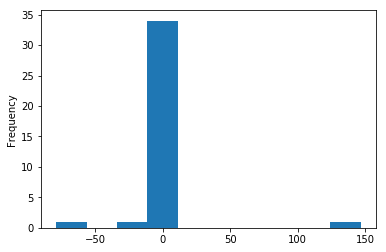

In [7]:
estaciones['Lon'].plot(kind = "hist")

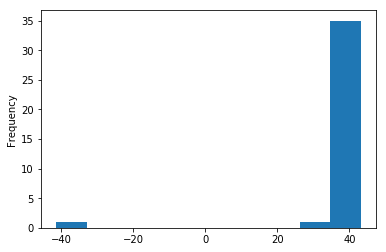

In [8]:
estaciones['Lat'].plot(kind = "hist")

In [9]:
estaciones = estaciones[estaciones['Lat'] > 40.]
estaciones = estaciones[estaciones['Lon'] > -10.]
estaciones = estaciones[estaciones['Lon'] < 10.]

In [10]:
MADRID_COORDS = [40.4167,  -3.70325]
m = folium.Map(MADRID_COORDS, zoom_start=11)

for index, row in estaciones.iterrows():
    if row['Lat'] != np.nan and row['Lon'] != np.nan: 
        folium.CircleMarker([row['Lat'], row['Lon']],
                            radius=2,
                            popup=row['DIRECCIÓN'],
                            fill_color="#3db7e4",
                           ).add_to(m)
        
# convertimos coordenadas a array de dos dimensiones
stationArr = estaciones[['Lat', 'Lon']].values

# ploteamos heatmap
from folium import plugins
m.add_child(plugins.HeatMap(stationArr, radius=25))
m

## Representación de contaminación durante el mes de septiembre

Preprocesa y representa los datos de contaminación en Madrid para el mes de septiembre. Tienes los datos cargados en la variable `contamina`.

In [11]:
# TU CÓDIGO AQUÍ
contamina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
ESTACION    720 non-null int64
MAGNITUD    720 non-null int64
ANO         720 non-null int64
MES         720 non-null int64
DIA         720 non-null int64
H08         720 non-null float64
dtypes: float64(1), int64(5)
memory usage: 33.8 KB


In [12]:
contamina.head()

ESTACION  MAGNITUD   ANO  MES  DIA   H08
0         4         7  2018    9    1   3.0
1         4         7  2018    9    2   3.0
2         4         7  2018    9    3  36.0
3         4         7  2018    9    4  51.0
4         4         7  2018    9    5  10.0

In [13]:
contamina['datestr'] = contamina['ANO'].astype(str) +"-"+ contamina['MES'].astype(str) +"-"+ contamina['DIA'].astype(str)
contamina['date'] = contamina.apply(lambda x: pd.to_datetime(x['datestr']), axis=1)
contamina.head()

ESTACION  MAGNITUD   ANO  MES  DIA   H08   datestr       date
0         4         7  2018    9    1   3.0  2018-9-1 2018-09-01
1         4         7  2018    9    2   3.0  2018-9-2 2018-09-02
2         4         7  2018    9    3  36.0  2018-9-3 2018-09-03
3         4         7  2018    9    4  51.0  2018-9-4 2018-09-04
4         4         7  2018    9    5  10.0  2018-9-5 2018-09-05

In [14]:
# vamos a seleccionar una estación en concreto como hicimos en el worksheet
contamina['ESTACION'].unique()

array([ 4,  8, 11, 16, 17, 18, 24, 27, 35, 36, 38, 39, 40, 47, 48, 49, 50,
       54, 55, 56, 57, 58, 59, 60], dtype=int64)

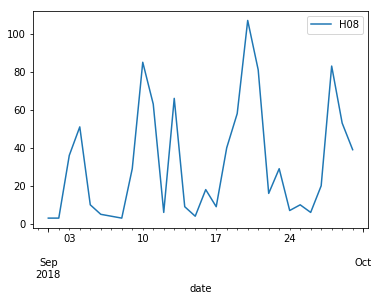

In [15]:
contamina[contamina['ESTACION'] == 4].sort_values(by = "date").plot(x = "date", y= "H08")

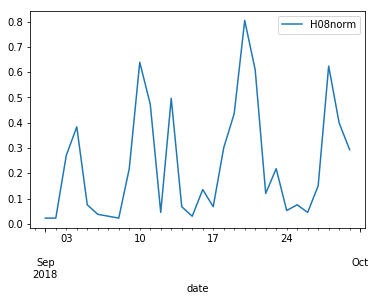

In [16]:
# normalizamos valores
contamina['H08norm'] = contamina['H08'] / max(contamina['H08'])
contamina[contamina['ESTACION'] == 4].sort_values(by = "date").plot(x = "date", y= "H08norm")

In [17]:
estaciones['NÚMERO'] = estaciones['NÚMERO'].astype(int)
merged = estaciones.merge(contamina, how = "inner", left_on = "NÚMERO", right_on = "ESTACION")
merged = merged[["ESTACION", "DIRECCIÓN", "Lon", "Lat", "date", "datestr", "H08norm", "H08"]]
merged.head()

ESTACION        DIRECCIÓN       Lon        Lat       date   datestr  \
0         4  Plaza de España -3.712247  40.423853 2018-09-01  2018-9-1   
1         4  Plaza de España -3.712247  40.423853 2018-09-02  2018-9-2   
2         4  Plaza de España -3.712247  40.423853 2018-09-03  2018-9-3   
3         4  Plaza de España -3.712247  40.423853 2018-09-04  2018-9-4   
4         4  Plaza de España -3.712247  40.423853 2018-09-05  2018-9-5   

    H08norm   H08  
0  0.022556   3.0  
1  0.022556   3.0  
2  0.270677  36.0  
3  0.383459  51.0  
4  0.075188  10.0

In [18]:
# construimos el dataset para que folium entienda los datos
days = merged['date'].unique()

heatmap_data = []
for d in days:
    day_data = [[row['Lat'], row['Lon'], row['H08norm']] for i, row in merged[merged['date'] == d].iterrows()]
    heatmap_data.append(day_data)
    
heatmap_data

[[[40.423852777777775, -3.7122472222222225, 0.022556390977443608],
  [40.42156388888888, -3.6823194444444445, 0.007518796992481203],
  [40.451475, -3.6773555555555553, 0.007518796992481203],
  [40.44004722222222, -3.6392333333333333, 0.007518796992481203],
  [40.34713888888889, -3.713322222222222, 0.007518796992481203],
  [40.394780555555556, -3.7318527777777777, 0.015037593984962405],
  [40.419355555555555, -3.7473472222222224, 0.007518796992481203],
  [40.47692777777778, -3.580030555555555, 0.09774436090225563],
  [40.41920833333333, -3.7031722222222223, 0.015037593984962405],
  [40.40794722222222, -3.6453055555555554, 0.015037593984962405],
  [40.445544444444444, -3.707127777777778, 0.007518796992481203],
  [40.47822777777778, -3.7115416666666667, 0.007518796992481203],
  [40.388152777777776, -3.6515222222222223, 0.015037593984962405],
  [40.398113888888886, -3.6868250000000002, 0.007518796992481203],
  [40.43989722222222, -3.690366666666667, 0.007518796992481203],
  [40.41444444444

In [19]:
MADRID_COORDS = [40.4167,  -3.70325]
m = folium.Map(MADRID_COORDS, zoom_start=11)

for index, row in estaciones.iterrows():
    if row['Lat'] != np.nan and row['Lon'] != np.nan: 
        folium.CircleMarker([row['Lat'], row['Lon']],
                            radius=2,
                            popup=row['DIRECCIÓN'],
                            fill_color="#3db7e4",
                           ).add_to(m)


hm = plugins.HeatMapWithTime(heatmap_data, radius = 60)
hm.add_to(m)
m

## Optimización de rutas

En el worksheet hemos hablado de optimización de rutas como un problema recurrente sobretodo para operaciones logísticas. Lamentablemente, no somos capaces de hacerlo por fuerza bruta en problemas grandes y tampoco sin distancias de ruta por carretera reales. Sin embargo, sí que tenemos la distancia haversine.

Imagina que después de una tormenta eléctrica, todos los dispositivos de medición de contaminación en Madrid se han estropeado y que eres el técnico encargado de repararlos. Si la central del técnico está situada en el punto origen propuesto, construye un algoritmo que calcule la ruta óptima, siendo esta la que más sensores permita reparar en menor tiempo posible y obtén la distancia total recorrida.

Estructura del algoritmo propuesta:
* Establecer punto de origen
* Repetir hasta que no queden puntos por visitar:
    * Calcular desde el punto actual la distancia a todos los puntos restantes.
    * Escoger el punto más cercano.
    * Marcar ese punto como punto ya visitado. No queremos visitar un mismo punto varias veces.
    * Establecer como nuevo punto de origen el seleccionado como más cercano.
* Una vez no queden más puntos por visitar, calcula la distancia de vuelta directamente a la central del técnico.

¿Serías capaz de pintar esta ruta en un mapa de folium?

In [31]:
ORIGEN_COORDS = [40.398113888888886, -3.6868250000000002]

def haversine(lon1, lat1, lon2, lat2):
    from math import radians, cos, sin, asin, sqrt
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radio de la tierra en km.
    
    return c * r

In [32]:
estaciones_ruta = estaciones[['ESTACIÓN', 'Lon', 'Lat']]
estaciones_ruta.head()

ESTACIÓN       Lon        Lat
0       Pza. de España -3.712247  40.423853
1     Escuelas Aguirre -3.682319  40.421564
2  Avda. Ramón y Cajal -3.677356  40.451475
3         Arturo Soria -3.639233  40.440047
4           Villaverde -3.713322  40.347139

In [33]:
# Preparamos los datos de las estaciones convirtiendolos a tuplas
# Esto simplemente lo hacemos para facilitar el trabajo luego.
puntos_ruta = []
for idx, row in estaciones.iterrows():
    puntos_ruta.append(
        tuple((row['Lat'], row['Lon'], row['ESTACIÓN']))
    )
puntos_ruta[:5]

[(40.423852777777775, -3.7122472222222225, 'Pza. de España'),
 (40.42156388888888, -3.6823194444444445, 'Escuelas Aguirre'),
 (40.451475, -3.6773555555555553, 'Avda. Ramón y Cajal'),
 (40.44004722222222, -3.6392333333333333, 'Arturo Soria'),
 (40.34713888888889, -3.713322222222222, 'Villaverde')]

In [43]:
# Implementamos la función que nos calcula la distancia a todos los puntos restantes
# y nos devuelve el punto más cercano y la distancia a tal punto.
def get_next_point_to_visit(punto_actual, puntos_restantes):
    distancias = []
    for p in puntos_restantes:
        distancias.append(haversine(punto_actual[1], punto_actual[0], p[1], p[0]))
    
    prox_punto = distancias.index(min(distancias))
    return tuple((puntos_restantes[prox_punto], min(distancias)))


punto_actual = tuple((ORIGEN_COORDS[0], ORIGEN_COORDS[1], 'Origen'))
prox_punto, prox_dist = get_next_point_to_visit(punto_actual, puntos_ruta)
print(prox_punto, " ", prox_dist)

(40.398113888888886, -3.6868250000000002, 'Mendez Alvaro')   0.0


In [52]:
# Algoritmo de ruta

puntos_restantes = puntos_ruta.copy() # hacemos copia para no vaciar la lista de puntos original
punto_actual = tuple((ORIGEN_COORDS[0], ORIGEN_COORDS[1], 'Origen'))
ruta = []
ruta.append(punto_actual)

distancia = 0
while len(puntos_restantes) >= 1:
    prox_punto, prox_distancia = get_next_point_to_visit(punto_actual, puntos_restantes)
    ruta.append(prox_punto)
    distancia += prox_distancia
    puntos_restantes.remove(prox_punto)
    punto_actual = prox_punto
    
    
# añadimos finalmente el origen de nuevo
ruta.append(tuple((ORIGEN_COORDS[0], ORIGEN_COORDS[1], 'Origen')))
print("Distancia total: {:.2f} km".format(distancia))

Distancia total: 75.54 km


In [25]:
m = folium.Map(ORIGEN_COORDS, zoom_start=11)

for i, e in enumerate(ruta):
    folium.CircleMarker([e[0], e[1]],
                    radius=2,
                    fill_color="#3db7e4",
                   ).add_to(m)

path = []
for i in range(len(ruta)):
    path.append([ruta[i][0], ruta[i][1]])

folium.PolyLine(path, weight=2.5, opacity=1).add_to(m)
folium.Marker(path[0]).add_to(m)
m

Compara ahora tu resultado con el resultado de OR-Tools. Recuerda que necesitas llamar a la función ```optimize``` de la clase ```HaversineRouteOptimizer``` que requiere los siguientes parámetros:
* Lista de localizaciones en coordenadas GPS.
* Lista de nombres de las localizaciones en el mismo orden.
* Localización de salida de los vehículos. Es el índice de uno de los puntos de localización. Siendo 0 el primer elemento, 1 el segundo, etc...
* Número de vehículos, en este caso sólo uno.

In [54]:
from optimizer import HaversineRouteOptimizer

# Creamos una lista de puntos adaptada al hdo
# e insertamos el origen el primero.
locations = [[p[0], p[1]] for p in puntos_ruta]
locations.insert(0, ORIGEN_COORDS)

names = [p[2] for p in puntos_ruta]
names.insert(0, 'Origen')

hro = HaversineRouteOptimizer()
hdo_route = hro.optimize(locations, names, origin = 0, n_vehicles = 1)
print(hdo_route)

Computing distance matrix...
Creating data model...
Results: 
Vehicle: 0   Distance:   70km   Route: ['Origen', 'Mendez Alvaro', 'Parque del Retiro', 'Escuelas Aguirre', 'Pza. del Carmen', 'Pza. de España', 'Castellana', 'Cuatro Caminos', 'Plaza Castilla', 'Avda. Ramón y Cajal', 'Arturo Soria', 'Juan Carlos I', 'Urb. Embajada', 'Barajas Pueblo', 'Sanchinarro', 'Tres Olivos', 'Barrio del Pilar', 'El Pardo', 'Casa de Campo', 'Farolillo', 'Pza. Fernández Ladreda', 'Villaverde', 'Vallecas', 'Ensanche de Vallecas', 'Moratalaz', 'Origen']
Total distance: 70km
[{'id': 0, 'steps': [0, 14, 16, 2, 9, 1, 15, 11, 17, 3, 4, 23, 19, 8, 21, 24, 12, 22, 7, 6, 20, 5, 13, 18, 10, 0], 'distance': 70}]


¿Serías capaz de mostrarla en folium para comparar?

In [27]:
# Adaptamos la ruta del HaversineDistanceOptimizer a folium
hdo_route_folium = []
for i in hdo_route[0]['steps']:
    hdo_route_folium.append(locations[i])

# Generamos la gráfica
m = folium.Map(ORIGEN_COORDS, zoom_start=11)
for i, e in enumerate(hdo_route_folium):
    folium.CircleMarker([e[0], e[1]],
                    radius=2,
                    fill_color="#3db7e4",
                   ).add_to(m)

path = []
for i in range(len(hdo_route_folium)):
    path.append([hdo_route_folium[i][0], hdo_route_folium[i][1]])

folium.PolyLine(path, weight=2.5, opacity=1).add_to(m)
folium.Marker(path[0]).add_to(m)
m